# Assessment - 1 Feature Engineering 

## link :- https://drive.google.com/file/d/1yVGuwqfPIA1iTOgnZeY5SkoxzBKnhaeM/view?usp=sharing

# Team - 8
#### 20MAI0075 BINAL MANOJ BARIYA

#### 20MAI0076 MERAJ AHMED

#### 20MAI0077  VIVEK DADHICH

#### 20MAI0079 KHEMRAJ GUPTA

#### 20MAI0080  SARANYA ROY

#### 20MAI0081  MESHANK ADHIA

#### 20MAI0082 RISHABH SHARMA

#### 20MAI0083 ASTHA TEMBHRE

In [11]:
import numpy as np
import pandas as pd

In [18]:
read = pd.read_csv("Real_state_data.csv")

In [19]:
read.head()

,Rooms_in_BHK,Number_of_buildings,Super_build_up_area,location,price_in_cr,Emi_available,Emi_amount_in_lac_per_month,Furnished,Householder,Car_parking_space,...,Total_floors,Water_availability_24X7,Number_of_bathrooms,Balconies,Constructed_or_Under_construction,Possession,Power_back_up,Pet_allowed,Facing,Purchased
0,2,3.0,781,Bandra,5.75,Yes,3.36,Unfurnished,Ownership,Yes,...,115,Yes,NaN,NaN,Constructed,2023,NaN,Yes,NaN,no
1,2,3.0,547,Kanjurmarg West,1.33,Yes,NaN,Unfurnished,Ownership,Yes,...,24,Yes,2.0,NaN,Under Construction,2022,no,Yes,East,yes
2,1,3.0,510,Kalyan Complex,1.80,Yes,NaN,Furnished,Ownership,No,...,24,Yes,1.0,2.0,Constructed,2021,no,Yes,West,yes
3,3,9.0,1280,"Chandivali, Powai",2.75,Yes,1.61,Unfurnished,Ownership,Yes,...,14,Yes,3.0,2.0,Under Construction,2024,NaN,Yes,North,no
4,3,3.0,740,Powai vihar,NaN,No,0.35,Furnished,Rent,Yes,...,8,Yes,2.0,1.0,Constructed,2021,no,Yes,West,yes


In [49]:
read.columns

Index(['Rooms_in_BHK', 'Number_of_buildings', 'Super_build_up_area',
       'location', 'price_in_cr', 'Emi_available',
       'Emi_amount_in_lac_per_month', 'Furnished', 'Householder',
       'Car_parking_space', 'Outskirts', 'Floor_number', 'Total_floors',
       'Water_availability_24X7', 'Number_of_bathrooms', 'Balconies',
       'Constructed_or_Under_construction', 'Possession', 'Power_back_up',
       'Pet_allowed', 'Facing', 'Purchased', 'New', 'parking_balcony'],
      dtype='object')

## Feature- 1

<AxesSubplot:>

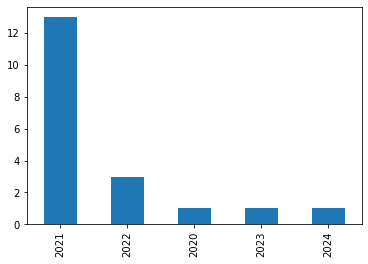

In [50]:
# Count of Possession Year

read["Possession"].value_counts().plot.bar()

## Feature- 2

In [43]:
a= read.groupby(by="Constructed_or_Under_construction",).sum()

In [51]:
a

,Rooms_in_BHK,Number_of_buildings,Super_build_up_area,price_in_cr,Emi_amount_in_lac_per_month,Floor_number,Total_floors,Number_of_bathrooms,Balconies,Possession,New,parking_balcony
Constructed_or_Under_construction,,,,,,,,,,,,
Constructed,36,22.0,19294,47.2,34.9200,133.0,341,31.0,23.0,30316,0,3
Under Construction,8,24.0,3054,5.7,3.0042,45.0,67,7.0,8.0,8090,4,2


## Feature- 3

In [35]:
read['parking_balcony'] = ((read.Balconies >= 2) & (read.Car_parking_space == 'Yes'))

In [52]:
# Display percent of rows where parking_balcony == 1
#homes with more than two balcony and car parking space are more popular amoung investers
read[read['parking_balcony']==1].shape[0]/read.shape[0]

0.2631578947368421

## Feature- 4

In [27]:
# Are they New or not
# We have considered  Constructed_or_Under_construction which are in Under Construction and Where Possession is greater than 2021
read["New"]= ((read["Constructed_or_Under_construction"] == "Under Construction") & (read["Possession"] > 2021))

In [53]:
read.head()

,Rooms_in_BHK,Number_of_buildings,Super_build_up_area,location,price_in_cr,Emi_available,Emi_amount_in_lac_per_month,Furnished,Householder,Car_parking_space,...,Number_of_bathrooms,Balconies,Constructed_or_Under_construction,Possession,Power_back_up,Pet_allowed,Facing,Purchased,New,parking_balcony
0,2,3.0,781,Bandra,5.75,Yes,3.36,Unfurnished,Ownership,Yes,...,NaN,NaN,Constructed,2023,NaN,Yes,NaN,no,False,False
1,2,3.0,547,Kanjurmarg West,1.33,Yes,NaN,Unfurnished,Ownership,Yes,...,2.0,NaN,Under Construction,2022,no,Yes,East,yes,True,False
2,1,3.0,510,Kalyan Complex,1.80,Yes,NaN,Furnished,Ownership,No,...,1.0,2.0,Constructed,2021,no,Yes,West,yes,False,False
3,3,9.0,1280,"Chandivali, Powai",2.75,Yes,1.61,Unfurnished,Ownership,Yes,...,3.0,2.0,Under Construction,2024,NaN,Yes,North,no,True,True
4,3,3.0,740,Powai vihar,NaN,No,0.35,Furnished,Rent,Yes,...,2.0,1.0,Constructed,2021,no,Yes,West,yes,False,False


## Feature- 5

In [48]:
#display the count of Landlords who owns furnished house
count = read[(read['Householder'] == 'Ownership') & (read['Furnished'] == 'Furnished')].count()[0]
print("The count of Householder who  like Furnished house are :- ",count)

The count of Householder who  like Furnished house are :-  2


In [4]:
read['Possession']= pd.to_datetime(read['Possession'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-06-23 00:00:00

In [30]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rooms_in_BHK                       19 non-null     int64  
 1   Number_of_buildings                12 non-null     float64
 2   Super_build_up_area                19 non-null     int64  
 3   location                           19 non-null     object 
 4   price_in_cr                        12 non-null     float64
 5   Emi_available                      19 non-null     object 
 6   Emi_amount_in_lac_per_month        17 non-null     float64
 7   Furnished                          19 non-null     object 
 8   Householder                        19 non-null     object 
 9   Car_parking_space                  19 non-null     object 
 10  Outskirts                          19 non-null     object 
 11  Floor_number                       18 non-null     float64
 

In [3]:
read.head()

,Rooms_in_BHK,Number_of_buildings,Super_build_up_area,location,price_in_cr,Emi_available,Emi_amount_in_lac_per_month,Furnished,Householder,Car_parking_space,...,Total_floors,Water_availability_24X7,Number_of_bathrooms,Balconies,Constructed_or_Under_construction,Possession,Power_back_up,Pet_allowed,Facing,Purchased
0,2,3.0,781,Bandra,5.75,Yes,3.36,Unfurnished,Ownership,Yes,...,115,Yes,NaN,NaN,Constructed,June 2023,NaN,Yes,NaN,no
1,2,3.0,547,Kanjurmarg West,1.33,Yes,NaN,Unfurnished,Ownership,Yes,...,24,Yes,2.0,NaN,Under Construction,Jun 2022,no,Yes,East,yes
2,1,3.0,510,Kalyan Complex,1.80,Yes,NaN,Furnished,Ownership,No,...,24,Yes,1.0,2.0,Constructed,NaN,no,Yes,West,yes
3,3,9.0,1280,"Chandivali, Powai",2.75,Yes,1.61,Unfurnished,Ownership,Yes,...,14,Yes,3.0,2.0,Under Construction,"Jul, 2024",NaN,Yes,North,no
4,3,3.0,740,Powai vihar,NaN,No,0.35,Furnished,Rent,Yes,...,8,Yes,2.0,1.0,Constructed,Feb 2021,no,Yes,West,yes


In [4]:
read.shape

(19, 22)

In [5]:
read.isnull().sum()

Rooms_in_BHK                          0
Number_of_buildings                   7
Super_build_up_area                   0
location                              0
price_in_cr                           7
Emi_available                         0
Emi_amount_in_lac_per_month           2
Furnished                             0
Householder                           0
Car_parking_space                     0
Outskirts                             0
Floor_number                          1
Total_floors                          0
Water_availability_24X7               4
Number_of_bathrooms                   3
Balconies                             2
Constructed_or_Under_construction     0
Possession                            1
Power_back_up                         6
Pet_allowed                           0
Facing                               10
Purchased                             0
dtype: int64

In [6]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rooms_in_BHK                       19 non-null     int64  
 1   Number_of_buildings                12 non-null     float64
 2   Super_build_up_area                19 non-null     int64  
 3   location                           19 non-null     object 
 4   price_in_cr                        12 non-null     float64
 5   Emi_available                      19 non-null     object 
 6   Emi_amount_in_lac_per_month        17 non-null     float64
 7   Furnished                          19 non-null     object 
 8   Householder                        19 non-null     object 
 9   Car_parking_space                  19 non-null     object 
 10  Outskirts                          19 non-null     object 
 11  Floor_number                       18 non-null     float64
 

In [7]:
cat_columns = [c for c in read.columns if read[c].dtypes == "O"]

In [8]:
Num_columns = [c for c in read.columns if read[c].dtypes != "O"]

In [9]:
Num_columns

['Rooms_in_BHK',
 'Number_of_buildings',
 'Super_build_up_area',
 'price_in_cr',
 'Emi_amount_in_lac_per_month',
 'Floor_number',
 'Total_floors',
 'Number_of_bathrooms',
 'Balconies']

In [10]:
cat_columns

['location',
 'Emi_available',
 'Furnished',
 'Householder',
 'Car_parking_space',
 'Outskirts',
 'Water_availability_24X7',
 'Constructed_or_Under_construction',
 'Possession',
 'Power_back_up',
 'Pet_allowed',
 'Facing',
 'Purchased']

In [11]:
# read["Number_of_buildings"].fillna(read["Number_of_buildings"].mode())
# read["Number_of_buildings"].fillna(read["Number_of_buildings"],method="mode")
for i in Num_columns:
#     print(i)
#     print(read[i].mode())
    read[i].fillna(read[i].mode(), inplace=True)

In [27]:
# read.Super_build_up_area
# read["Number_of_buildings"].fillna(value=read[i].mode(),inplace=True)
for i in Num_columns:
#     print(i)
#     print(read[i].mode())
    value = read[i].mode()
    print(value)
#     read[i].replace("NaN",  value)

0    2
dtype: int64
0    3.0
dtype: float64
0      450
1      510
2      527
3      547
4      550
5      664
6      700
7      740
8      750
9      755
10     781
11     895
12    1250
13    1280
14    1450
15    2000
16    2450
17    2500
18    3549
dtype: int64
0    1.02
1    1.80
2    4.15
3    5.75
dtype: float64
0    0.42
dtype: float64
0    7.0
dtype: float64
0     3
1    12
2    15
3    17
4    24
dtype: int64
0    2.0
dtype: float64
0    0.0
dtype: float64


In [ ]:
from sklearn.calibration

In [20]:
read["Number_of_buildings"]

0     3.0
1     3.0
2     3.0
3     9.0
4     3.0
5     7.0
6     NaN
7     2.0
8     5.0
9     1.0
10    4.0
11    NaN
12    NaN
13    NaN
14    1.0
15    NaN
16    NaN
17    5.0
18    NaN
Name: Number_of_buildings, dtype: float64

In [13]:
read.isnull().sum()

Rooms_in_BHK                          0
Number_of_buildings                   7
Super_build_up_area                   0
location                              0
price_in_cr                           3
Emi_available                         0
Emi_amount_in_lac_per_month           2
Furnished                             0
Householder                           0
Car_parking_space                     0
Outskirts                             0
Floor_number                          0
Total_floors                          0
Water_availability_24X7               4
Number_of_bathrooms                   2
Balconies                             1
Constructed_or_Under_construction     0
Possession                            1
Power_back_up                         6
Pet_allowed                           0
Facing                               10
Purchased                             0
dtype: int64

In [14]:
# read["Number_of_buildings"].mode()

In [15]:
# read.Number_of_buildings

In [16]:
# for i in cat_columns:
#     print(i,":- ",read[i].unique,end=" ")

In [17]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit_transform()